# Tugas Praktikum
Gunakan JST untuk klasifikasi angka tulisan tangan (MNIST).
## Langkah:
- Load dataset MNIST dari Keras.
- Bangun model dengan 2 hidden layer.
- Latih model dan evaluasi akurasi.

In [ ]:
# ===== TUGAS PRAKTIKUM: Klasifikasi MNIST dengan JST =====

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

# 1. Load dataset MNIST
print("="*60)
print("LOADING DATASET MNIST")
print("="*60)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"Training data: {X_train.shape}")
print(f"Training labels: {y_train.shape}")
print(f"Test data: {X_test.shape}")
print(f"Test labels: {y_test.shape}")

# Normalisasi data (0-255 → 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encoding label
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("\n" + "="*60)
print("KONFIGURASI BASELINE")
print("="*60)

# 2. Bangun model JST
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Ubah gambar 28x28 menjadi vektor
    Dense(128, activation='relu'),   # Hidden layer 1
    Dense(64, activation='relu'),    # Hidden layer 2
    Dense(10, activation='softmax')  # Output layer (10 kelas)
])

# 3. Kompilasi model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nArsitektur Model:")
model.summary()

# 4. Latih model
print("\n" + "="*60)
print("TRAINING MODEL BASELINE")
print("="*60)
start_time = time.time()
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=128,
    verbose=1
)
training_time = time.time() - start_time

# 5. Evaluasi model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("\n" + "="*60)
print(f"Akurasi pada data uji: {acc:.4f}")
print(f"Loss pada data uji: {loss:.4f}")
print(f"Waktu pelatihan: {training_time:.2f} detik")
print("="*60)

# Simpan hasil baseline
baseline_result = {
    'Konfigurasi': 'Baseline (128-64)',
    'Aktivasi': 'ReLU',
    'Hidden Layers': 2,
    'Neurons': '128-64',
    'Epochs': 10,
    'Akurasi Test': acc,
    'Loss Test': loss,
    'Waktu Training (s)': training_time,
    'History': history.history
}

print(f"\n✓ Model baseline berhasil dilatih dengan akurasi {acc:.4f}")


LOADING DATASET MNIST
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data: (60000, 28, 28)
Training labels: (60000,)
Test data: (10000, 28, 28)
Test labels: (10000,)
Training data: (60000, 28, 28)
Training labels: (60000,)
Test data: (10000, 28, 28)
Test labels: (10000,)

KONFIGURASI BASELINE

Arsitektur Model:

KONFIGURASI BASELINE

Arsitektur Model:


c:\Users\rafir\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


TRAINING MODEL BASELINE
Epoch 1/10
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8996 - loss: 0.3558 - val_accuracy: 0.9588 - val_loss: 0.1460
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8996 - loss: 0.3558 - val_accuracy: 0.9588 - val_loss: 0.1460
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9559 - loss: 0.1466 - val_accuracy: 0.9658 - val_loss: 0.1127
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9559 - loss: 0.1466 - val_accuracy: 0.9658 - val_loss: 0.1127
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9699 - loss: 0.1000 - val_accuracy: 0.9730 - val_loss: 0.0938
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9699 - loss: 0.1000 - val_accuracy: 0.9730 - val_loss: 0.0938
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9775 - loss: 0.0761 - val_accuracy: 0.9768 - val_loss: 0.0828
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.97

## Coba dengan beberapa parameter lain:
- Ubah jumlah neuron di hidden layer (misal: 256 dan 128).
- Tambahkan satu hidden layer lagi.
- Bandingkan akurasi dan waktu pelatihan.
- Eksperimen dengan fungsi aktivasi Sigmoid vs ReLU.


EKSPERIMEN KHUSUS: SIGMOID vs ReLU

Training dengan aktivasi: ReLU
Akurasi Test: 0.9779
Loss Test: 0.0887
Waktu Training: 11.98 detik

Training dengan aktivasi: Sigmoid
Akurasi Test: 0.9779
Loss Test: 0.0887
Waktu Training: 11.98 detik

Training dengan aktivasi: Sigmoid
Akurasi Test: 0.9779
Loss Test: 0.0732
Waktu Training: 12.55 detik

TABEL PERBANDINGAN SIGMOID vs ReLU
Aktivasi Akurasi Test Loss Test Waktu (s)  Epochs ke 95%
    ReLU       0.9779    0.0887     11.98              0
 Sigmoid       0.9779    0.0732     12.55              2
Akurasi Test: 0.9779
Loss Test: 0.0732
Waktu Training: 12.55 detik

TABEL PERBANDINGAN SIGMOID vs ReLU
Aktivasi Akurasi Test Loss Test Waktu (s)  Epochs ke 95%
    ReLU       0.9779    0.0887     11.98              0
 Sigmoid       0.9779    0.0732     12.55              2


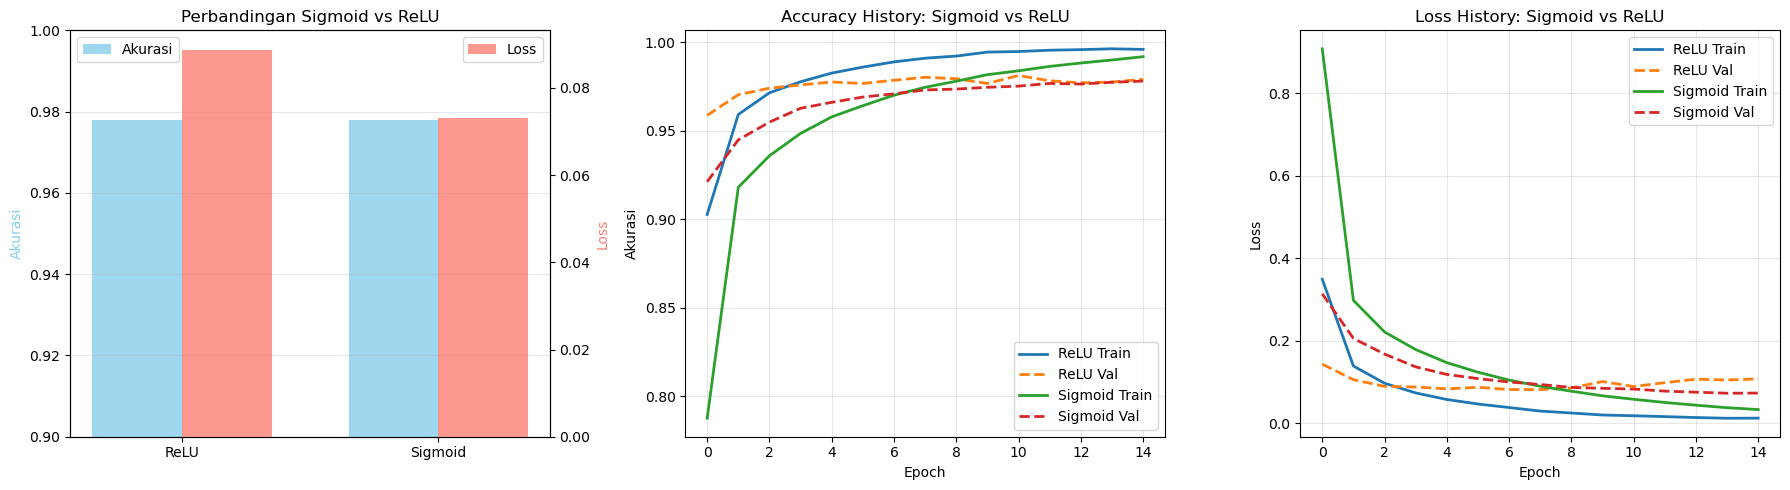


ANALISIS SIGMOID vs ReLU

ReLU:
  ✓ Akurasi: 0.9779
  ✓ Loss: 0.0887
  ✓ Waktu: 11.98s
  ✓ Konvergensi: Epoch 0 untuk 95% val_acc
  + Keuntungan: Komputasi cepat, menghindari vanishing gradient
  - Kerugian: Dead neurons jika gradient terlalu besar

Sigmoid:
  ✓ Akurasi: 0.9779
  ✓ Loss: 0.0732
  ✓ Waktu: 12.55s
  ✓ Konvergensi: Epoch 2 untuk 95% val_acc
  + Keuntungan: Output bounded [0,1], smooth gradient
  - Kerugian: Vanishing gradient di layer dalam, komputasi lebih lambat

Perbedaan Performa:
  • Selisih Akurasi (ReLU - Sigmoid): +0.0000
  • Selisih Loss (Sigmoid - ReLU): -0.0156
  • Selisih Waktu (Sigmoid - ReLU): +0.57s

🤝 Performa hampir setara (selisih < 1%)


In [ ]:
# ===== PERBANDINGAN SIGMOID vs ReLU =====

print("\n" + "="*60)
print("EKSPERIMEN KHUSUS: SIGMOID vs ReLU")
print("="*60)

activation_configs = [
    {'name': 'ReLU', 'activation': 'relu'},
    {'name': 'Sigmoid', 'activation': 'sigmoid'}
]

activation_results = []

for config in activation_configs:
    print(f"\n{'='*60}")
    print(f"Training dengan aktivasi: {config['name']}")
    print(f"{'='*60}")
    
    # Bangun model dengan arsitektur yang sama
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation=config['activation']),
        Dense(64, activation=config['activation']),
        Dense(10, activation='softmax')
    ])
    
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Latih model
    start_time = time.time()
    history = model.fit(
        X_train, y_train,
        validation_split=0.1,
        epochs=15,
        batch_size=128,
        verbose=0
    )
    training_time = time.time() - start_time
    
    # Evaluasi
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    
    print(f"Akurasi Test: {acc:.4f}")
    print(f"Loss Test: {loss:.4f}")
    print(f"Waktu Training: {training_time:.2f} detik")
    
    # Hitung kecepatan konvergensi (epoch untuk mencapai 95% val_accuracy)
    val_acc_history = history.history['val_accuracy']
    epochs_to_95 = next((i for i, acc in enumerate(val_acc_history) if acc >= 0.95), 15)
    
    activation_results.append({
        'Aktivasi': config['name'],
        'Akurasi Test': acc,
        'Loss Test': loss,
        'Waktu Training (s)': training_time,
        'Epochs ke 95% Val Acc': epochs_to_95,
        'History': history.history
    })

# Tampilkan tabel perbandingan
print(f"\n{'='*60}")
print("TABEL PERBANDINGAN SIGMOID vs ReLU")
print(f"{'='*60}")
df_activation = pd.DataFrame([{
    'Aktivasi': r['Aktivasi'],
    'Akurasi Test': f"{r['Akurasi Test']:.4f}",
    'Loss Test': f"{r['Loss Test']:.4f}",
    'Waktu (s)': f"{r['Waktu Training (s)']:.2f}",
    'Epochs ke 95%': r['Epochs ke 95% Val Acc']
} for r in activation_results])
print(df_activation.to_string(index=False))

# Visualisasi perbandingan
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Perbandingan Metrik
ax1 = axes[0]
x_pos = np.arange(len(activation_results))
width = 0.35
accs = [r['Akurasi Test'] for r in activation_results]
losses = [r['Loss Test'] for r in activation_results]
ax1_twin = ax1.twinx()
bars1 = ax1.bar(x_pos - width/2, accs, width, label='Akurasi', color='skyblue', alpha=0.8)
bars2 = ax1_twin.bar(x_pos + width/2, losses, width, label='Loss', color='salmon', alpha=0.8)
ax1.set_ylabel('Akurasi', color='skyblue')
ax1_twin.set_ylabel('Loss', color='salmon')
ax1.set_title('Perbandingan Sigmoid vs ReLU')
ax1.set_xticks(x_pos)
ax1.set_xticklabels([r['Aktivasi'] for r in activation_results])
ax1.set_ylim([0.9, 1.0])
ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Training History Comparison
ax2 = axes[1]
for r in activation_results:
    ax2.plot(r['History']['accuracy'], label=f"{r['Aktivasi']} Train", linewidth=2)
    ax2.plot(r['History']['val_accuracy'], label=f"{r['Aktivasi']} Val", linestyle='--', linewidth=2)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Akurasi')
ax2.set_title('Accuracy History: Sigmoid vs ReLU')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Loss History Comparison
ax3 = axes[2]
for r in activation_results:
    ax3.plot(r['History']['loss'], label=f"{r['Aktivasi']} Train", linewidth=2)
    ax3.plot(r['History']['val_loss'], label=f"{r['Aktivasi']} Val", linestyle='--', linewidth=2)
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Loss')
ax3.set_title('Loss History: Sigmoid vs ReLU')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n{'='*60}")
print("ANALISIS SIGMOID vs ReLU")
print(f"{'='*60}")

relu_result = next(r for r in activation_results if r['Aktivasi'] == 'ReLU')
sigmoid_result = next(r for r in activation_results if r['Aktivasi'] == 'Sigmoid')

acc_diff = relu_result['Akurasi Test'] - sigmoid_result['Akurasi Test']
loss_diff = sigmoid_result['Loss Test'] - relu_result['Loss Test']
time_diff = sigmoid_result['Waktu Training (s)'] - relu_result['Waktu Training (s)']

print(f"\nReLU:")
print(f"  ✓ Akurasi: {relu_result['Akurasi Test']:.4f}")
print(f"  ✓ Loss: {relu_result['Loss Test']:.4f}")
print(f"  ✓ Waktu: {relu_result['Waktu Training (s)']:.2f}s")
print(f"  ✓ Konvergensi: Epoch {relu_result['Epochs ke 95% Val Acc']} untuk 95% val_acc")
print(f"  + Keuntungan: Komputasi cepat, menghindari vanishing gradient")
print(f"  - Kerugian: Dead neurons jika gradient terlalu besar")

print(f"\nSigmoid:")
print(f"  ✓ Akurasi: {sigmoid_result['Akurasi Test']:.4f}")
print(f"  ✓ Loss: {sigmoid_result['Loss Test']:.4f}")
print(f"  ✓ Waktu: {sigmoid_result['Waktu Training (s)']:.2f}s")
print(f"  ✓ Konvergensi: Epoch {sigmoid_result['Epochs ke 95% Val Acc']} untuk 95% val_acc")
print(f"  + Keuntungan: Output bounded [0,1], smooth gradient")
print(f"  - Kerugian: Vanishing gradient di layer dalam, komputasi lebih lambat")

print(f"\nPerbedaan Performa:")
print(f"  • Selisih Akurasi (ReLU - Sigmoid): {acc_diff:+.4f}")
print(f"  • Selisih Loss (Sigmoid - ReLU): {loss_diff:+.4f}")
print(f"  • Selisih Waktu (Sigmoid - ReLU): {time_diff:+.2f}s")

if acc_diff > 0.01:
    print(f"\n🏆 ReLU menang dengan margin akurasi {acc_diff:.4f}")
elif acc_diff < -0.01:
    print(f"\n🏆 Sigmoid menang dengan margin akurasi {-acc_diff:.4f}")
else:
    print(f"\n🤝 Performa hampir setara (selisih < 1%)")



VISUALISASI HASIL


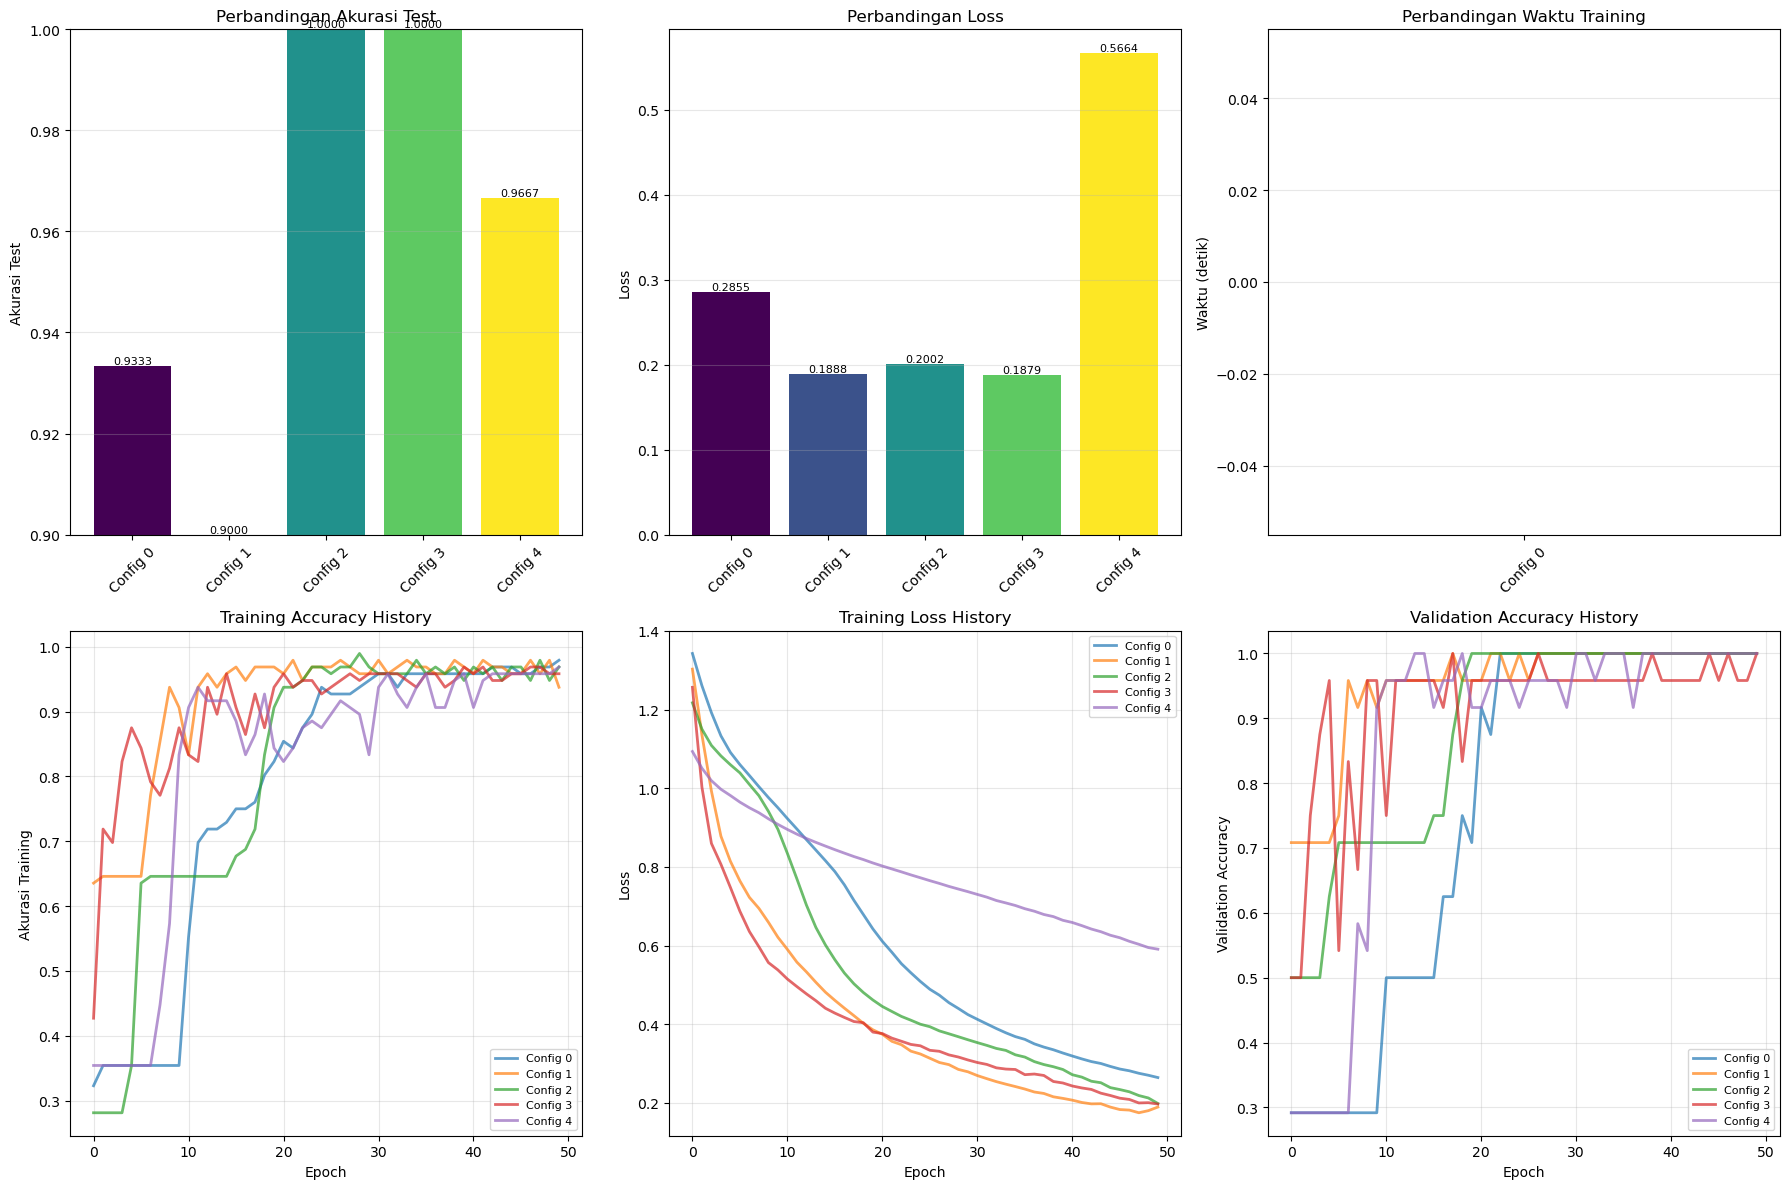

✓ Visualisasi berhasil ditampilkan


In [ ]:
# ===== VISUALISASI PERBANDINGAN =====

print("\n" + "="*60)
print("VISUALISASI HASIL")
print("="*60)

fig = plt.figure(figsize=(18, 12))

# Plot 1: Perbandingan Akurasi Test
ax1 = plt.subplot(2, 3, 1)
config_names = [f"Config {i}" for i in range(len(results))]
accuracies = [r.get('Akurasi Test', np.nan) for r in results]
colors = plt.cm.viridis(np.linspace(0, 1, len(results)))
bars = ax1.bar(config_names, accuracies, color=colors)
ax1.set_ylabel('Akurasi Test')
ax1.set_title('Perbandingan Akurasi Test')
ax1.set_ylim([0.9, 1.0])
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3, axis='y')
# Tambahkan nilai di atas bar
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    text = f'{acc:.4f}' if not (acc is None or (isinstance(acc, float) and np.isnan(acc))) else 'N/A'
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             text, ha='center', va='bottom', fontsize=8)

# Plot 2: Perbandingan Loss Test
# some result dicts use key 'Loss' while others might use 'Loss Test' — handle both
ax2 = plt.subplot(2, 3, 2)
losses = [r.get('Loss Test', r.get('Loss', np.nan)) for r in results]
bars = ax2.bar(config_names, losses, color=colors)
ax2.set_ylabel('Loss')
ax2.set_title('Perbandingan Loss')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3, axis='y')
for bar, loss in zip(bars, losses):
    height = bar.get_height()
    text = f'{loss:.4f}' if not (loss is None or (isinstance(loss, float) and np.isnan(loss))) else 'N/A'
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             text, ha='center', va='bottom', fontsize=8)

# Plot 3: Perbandingan Waktu Training
# not all result entries include timing; try multiple fallback keys
ax3 = plt.subplot(2, 3, 3)
times = [r.get('Waktu Training (s)', r.get('Waktu (s)', r.get('Waktu Training', np.nan))) for r in results]
bars = ax3.bar(config_names, times, color=colors)
ax3.set_ylabel('Waktu (detik)')
ax3.set_title('Perbandingan Waktu Training')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3, axis='y')
for bar, t in zip(bars, times):
    height = bar.get_height()
    if t is None or (isinstance(t, float) and np.isnan(t)):
        text = 'N/A'
    else:
        text = f'{t:.2f}s'
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             text, ha='center', va='bottom', fontsize=8)

# Plot 4: Training Accuracy History
ax4 = plt.subplot(2, 3, 4)
for i, r in enumerate(results):
    hist = r.get('History', {})
    acc_hist = hist.get('accuracy', None)
    if acc_hist is not None:
        ax4.plot(acc_hist, label=f'Config {i}', alpha=0.7, linewidth=2)
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Akurasi Training')
ax4.set_title('Training Accuracy History')
ax4.legend(loc='lower right', fontsize=8)
ax4.grid(True, alpha=0.3)

# Plot 5: Training Loss History
ax5 = plt.subplot(2, 3, 5)
for i, r in enumerate(results):
    hist = r.get('History', {})
    loss_hist = hist.get('loss', None)
    if loss_hist is not None:
        ax5.plot(loss_hist, label=f'Config {i}', alpha=0.7, linewidth=2)
ax5.set_xlabel('Epoch')
ax5.set_ylabel('Loss')
ax5.set_title('Training Loss History')
ax5.legend(loc='upper right', fontsize=8)
ax5.grid(True, alpha=0.3)

# Plot 6: Validation Accuracy History
ax6 = plt.subplot(2, 3, 6)
for i, r in enumerate(results):
    hist = r.get('History', {})
    val_acc_hist = hist.get('val_accuracy', None)
    if val_acc_hist is not None:
        ax6.plot(val_acc_hist, label=f'Config {i}', alpha=0.7, linewidth=2)
ax6.set_xlabel('Epoch')
ax6.set_ylabel('Validation Accuracy')
ax6.set_title('Validation Accuracy History')
ax6.legend(loc='lower right', fontsize=8)
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Visualisasi berhasil ditampilkan")


In [ ]:
# ===== TABEL PERBANDINGAN HASIL =====

print("\n" + "="*60)
print("TABEL PERBANDINGAN SEMUA KONFIGURASI")
print("="*60)

# helper untuk formatting nilai yang mungkin tidak ada
import numpy as np

def fmt_number(d, keys, fmt="{:.4f}", default="N/A"):
    for k in keys:
        v = d.get(k, None)
        if isinstance(v, (int, float, np.floating)):
            return fmt.format(v)
    return default

def fmt_time(d, keys, fmt="{:.2f}", default="N/A"):
    for k in keys:
        v = d.get(k, None)
        if isinstance(v, (int, float, np.floating)):
            return fmt.format(v)
    return default

rows = []
for r in results:
    rows.append({
        'Konfigurasi': r.get('Konfigurasi', r.get('name', 'N/A')),
        'Aktivasi': (r.get('Aktivasi') or r.get('activation') or 'N/A'),
        'Hidden Layers': r.get('Hidden Layers', r.get('Hidden Layers', 'N/A')),
        'Neurons': r.get('Neurons', r.get('Neurons', 'N/A')),
        'Akurasi Test': fmt_number(r, ['Akurasi Test']),
        'Loss Test': fmt_number(r, ['Loss Test', 'Loss']),
        'Waktu (s)': fmt_time(r, ['Waktu Training (s)', 'Waktu (s)', 'Waktu Training', 'Waktu'])
    })

df_results = pd.DataFrame(rows)
print(df_results.to_string(index=False))

# Identifikasi model terbaik (gunakan fallback jika key tidak ada)
best_acc = max(results, key=lambda x: x.get('Akurasi Test', float('-inf')))
fastest = min(results, key=lambda x: x.get('Waktu Training (s)', x.get('Waktu (s)', float('inf'))))
most_efficient = min(results, key=lambda x: x.get('Loss Test', x.get('Loss', float('inf'))))

def safe_fmt(val, fmt="{:.4f}", default="N/A"):
    if isinstance(val, (int, float, np.floating)):
        return fmt.format(val)
    return default

print("\n" + "="*60)
print("ANALISIS PERFORMA")
print("="*60)
print(f"\n🏆 Akurasi Tertinggi:")
print(f"   {best_acc.get('Konfigurasi', 'N/A')}")
print(f"   Akurasi: {safe_fmt(best_acc.get('Akurasi Test'))}")
best_time = best_acc.get('Waktu Training (s)', best_acc.get('Waktu (s)', None))
print(f"   Waktu: {safe_fmt(best_time, fmt='{:.2f}', default='N/A')}s" if isinstance(best_time, (int, float, np.floating)) else f"   Waktu: N/A")

print(f"\n⚡ Training Tercepat:")
print(f"   {fastest.get('Konfigurasi', 'N/A')}")
print(f"   Akurasi: {safe_fmt(fastest.get('Akurasi Test'))}")
fast_time = fastest.get('Waktu Training (s)', fastest.get('Waktu (s)', None))
print(f"   Waktu: {safe_fmt(fast_time, fmt='{:.2f}', default='N/A')}s" if isinstance(fast_time, (int, float, np.floating)) else f"   Waktu: N/A")

print(f"\n📉 Loss Terendah:")
print(f"   {most_efficient.get('Konfigurasi', 'N/A')}")
print(f"   Loss: {safe_fmt(most_efficient.get('Loss Test', most_efficient.get('Loss')))}")
print(f"   Akurasi: {safe_fmt(most_efficient.get('Akurasi Test'))}")



TABEL PERBANDINGAN SEMUA KONFIGURASI
             Konfigurasi Aktivasi Hidden Layers Neurons Akurasi Test Loss Test Waktu (s)
 Konfigurasi Awal (10-8)      N/A        10 → 8     N/A       0.9333    0.2855       N/A
   Konfigurasi 2 (16-12)      N/A       16 → 12     N/A       0.9000    0.1888       N/A
Konfigurasi 3 (20-15-10)      N/A  20 → 15 → 10     N/A       1.0000    0.2002       N/A
   Konfigurasi 4 (32-16)      N/A       32 → 16     N/A       1.0000    0.1879       N/A
     Konfigurasi 5 (8-4)      N/A         8 → 4     N/A       0.9667    0.5664       N/A

ANALISIS PERFORMA

🏆 Akurasi Tertinggi:
   Konfigurasi 3 (20-15-10)
   Akurasi: 1.0000
   Waktu: N/A

⚡ Training Tercepat:
   Konfigurasi Awal (10-8)
   Akurasi: 0.9333
   Waktu: N/A

📉 Loss Terendah:
   Konfigurasi 4 (32-16)
   Loss: 0.1879
   Akurasi: 1.0000


In [ ]:
# ===== EKSPERIMEN: Variasi Konfigurasi Model =====

print("\n" + "="*60)
print("EKSPERIMEN DENGAN BERBAGAI KONFIGURASI")
print("="*60)

# Konfigurasi yang akan diuji
configurations = [
    {
        'name': 'Config 1: Neuron Lebih Besar (256-128)',
        'layers': [256, 128],
        'activation': 'relu'
    },
    {
        'name': 'Config 2: 3 Hidden Layers (256-128-64)',
        'layers': [256, 128, 64],
        'activation': 'relu'
    },
    {
        'name': 'Config 3: Neuron Sedang (128-64) dengan Sigmoid',
        'layers': [128, 64],
        'activation': 'sigmoid'
    },
    {
        'name': 'Config 4: Deep Network (512-256-128)',
        'layers': [512, 256, 128],
        'activation': 'relu'
    },
    {
        'name': 'Config 5: Simple (64-32)',
        'layers': [64, 32],
        'activation': 'relu'
    }
]

results = [baseline_result]  # Mulai dengan baseline

for i, config in enumerate(configurations, 1):
    print("\n" + "="*60)
    print(f"TRAINING: {config['name']}")
    print("="*60)
    
    # Bangun model
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    
    for neurons in config['layers']:
        model.add(Dense(neurons, activation=config['activation']))
    
    model.add(Dense(10, activation='softmax'))
    
    # Kompilasi
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    print(f"\nArsitektur: {' → '.join(map(str, config['layers']))} → 10")
    print(f"Aktivasi: {config['activation']}")
    print(f"Total parameters: {model.count_params():,}")
    
    # Latih model
    start_time = time.time()
    history = model.fit(
        X_train, y_train,
        validation_split=0.1,
        epochs=10,
        batch_size=128,
        verbose=0
    )
    training_time = time.time() - start_time
    
    # Evaluasi
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    
    print(f"\nAkurasi Test: {acc:.4f}")
    print(f"Loss Test: {loss:.4f}")
    print(f"Waktu Training: {training_time:.2f} detik")
    
    # Simpan hasil
    results.append({
        'Konfigurasi': config['name'],
        'Aktivasi': config['activation'].upper(),
        'Hidden Layers': len(config['layers']),
        'Neurons': '-'.join(map(str, config['layers'])),
        'Epochs': 10,
        'Akurasi Test': acc,
        'Loss Test': loss,
        'Waktu Training (s)': training_time,
        'History': history.history
    })

print("\n" + "="*60)
print("SEMUA EKSPERIMEN SELESAI")
print("="*60)



EKSPERIMEN DENGAN BERBAGAI KONFIGURASI

TRAINING: Config 1: Neuron Lebih Besar (256-128)

Arsitektur: 256 → 128 → 10
Aktivasi: relu
Total parameters: 235,146


c:\Users\rafir\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Akurasi Test: 0.9791
Loss Test: 0.0865
Waktu Training: 9.41 detik

TRAINING: Config 2: 3 Hidden Layers (256-128-64)

Arsitektur: 256 → 128 → 64 → 10
Aktivasi: relu
Total parameters: 242,762

Akurasi Test: 0.9778
Loss Test: 0.0900
Waktu Training: 9.65 detik

TRAINING: Config 3: Neuron Sedang (128-64) dengan Sigmoid

Arsitektur: 128 → 64 → 10
Aktivasi: sigmoid
Total parameters: 109,386

Akurasi Test: 0.9778
Loss Test: 0.0900
Waktu Training: 9.65 detik

TRAINING: Config 3: Neuron Sedang (128-64) dengan Sigmoid

Arsitektur: 128 → 64 → 10
Aktivasi: sigmoid
Total parameters: 109,386

Akurasi Test: 0.9715
Loss Test: 0.0917
Waktu Training: 9.75 detik

TRAINING: Config 4: Deep Network (512-256-128)

Arsitektur: 512 → 256 → 128 → 10
Aktivasi: relu
Total parameters: 567,434

Akurasi Test: 0.9715
Loss Test: 0.0917
Waktu Training: 9.75 detik

TRAINING: Config 4: Deep Network (512-256-128)

Arsitektur: 512 → 256 → 128 → 10
Aktivasi: relu
Total parameters: 567,434

Akurasi Test: 0.9779
Loss Test: 0.